# Final predict

In [50]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, classification_report, balanced_accuracy_score
from imblearn.over_sampling import SMOTE

## Train

In [51]:
train = pd.read_csv('data/cleaned_train_no_drop.csv')
train.shape

(80942, 58)

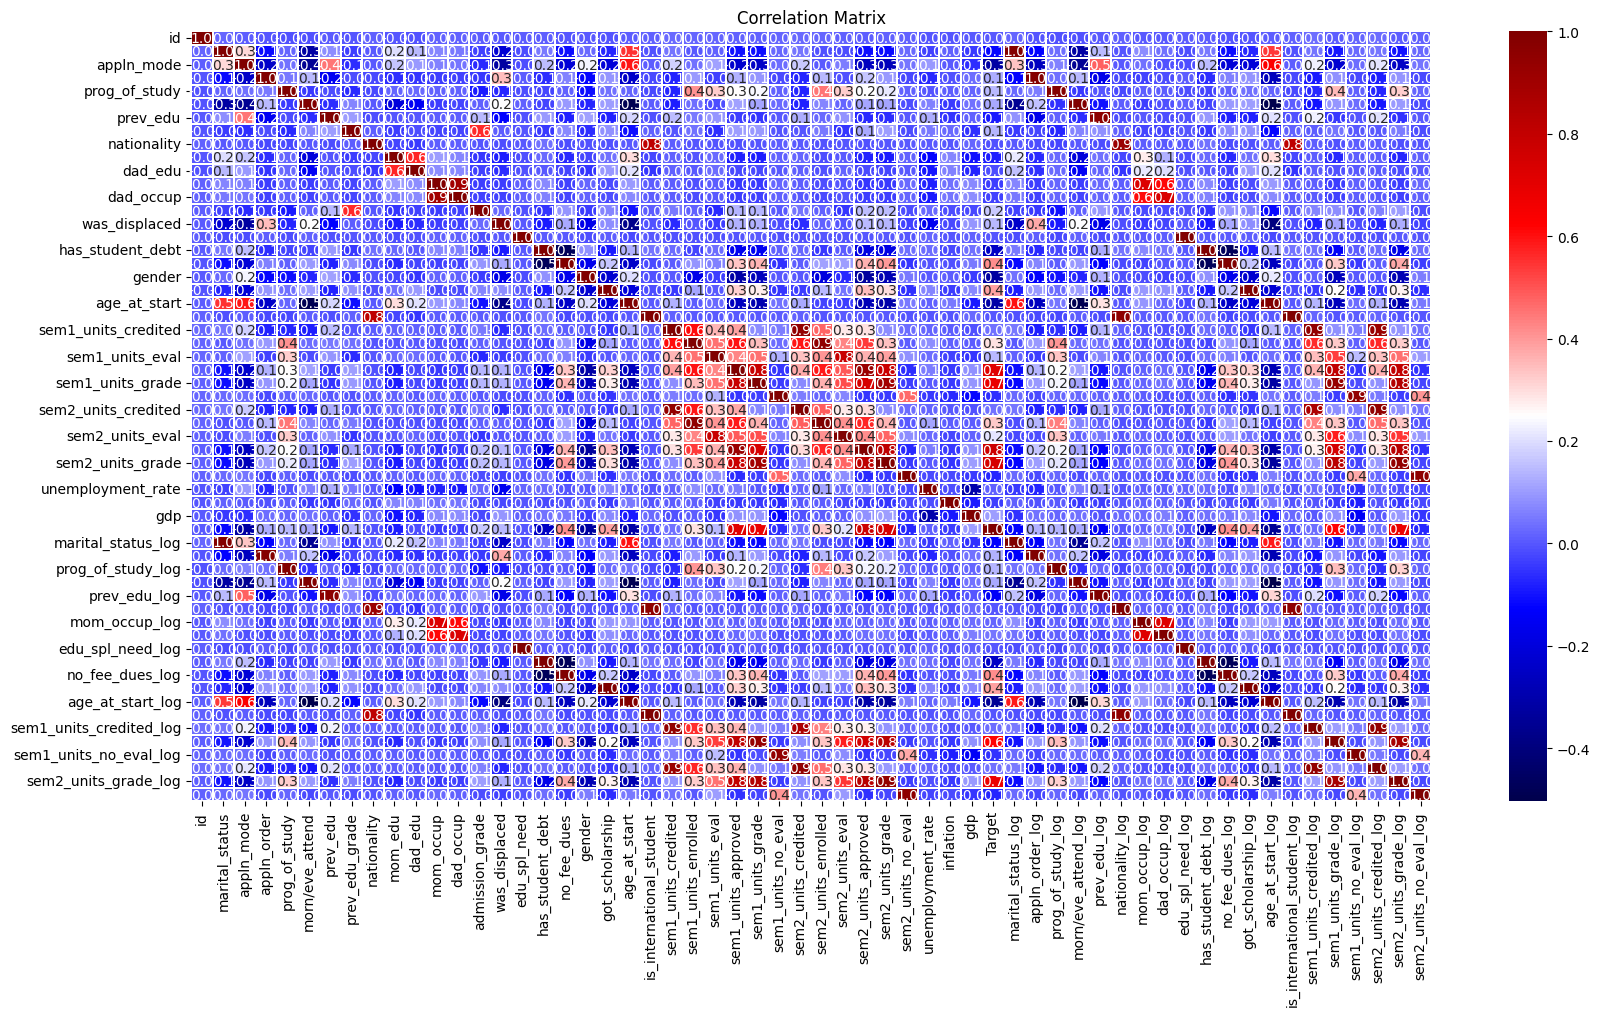

In [52]:
from sklearn.preprocessing import LabelEncoder

def plot_corr(df):
    df1 = df.copy()
    le = LabelEncoder()
    df1['Target'] = le.fit_transform(df1['Target'])
    corr = df1.corr()
    plt.figure(figsize=(20, 10))
    sns.heatmap(corr, annot=True,cmap='seismic', fmt=".1f", linewidths=0.1)
    plt.title('Correlation Matrix')
    plt.show()

    return corr

_ = plot_corr(train)

In [53]:
feats = pd.read_csv('data/features_no_drop.txt',sep=' ',header=None)[0].tolist()
feats

['sem2_units_approved',
 'no_fee_dues',
 'got_scholarship_log',
 'sem2_units_enrolled',
 'sem2_units_eval',
 'admission_grade',
 'was_displaced',
 'prog_of_study',
 'sem1_units_eval',
 'prev_edu_grade',
 'appln_order_log',
 'morn/eve_attend_log',
 'gdp',
 'marital_status',
 'has_student_debt_log',
 'age_at_start',
 'appln_mode',
 'gender']

In [54]:
train1 = train[feats + ['Target']]
train1.shape

(80942, 19)

In [55]:
X,y = train.drop(columns=['Target','id','nationality']).values, train['Target'].values

# Train test split
le = LabelEncoder()
y_l = le.fit(y)
y_enc = y_l.transform(y)

X_train, X_val, y_train, y_val = train_test_split(X, y_enc, test_size=0.2, random_state=42)

In [56]:
X_train1, y_train1 = SMOTE().fit_resample(X_train,y_train)

### Random Forest

In [57]:
estims = [5,10,20,50,100,200,300]
model = RandomForestClassifier()
acc,tim = [], []
for x in estims:
    model = RandomForestClassifier(n_estimators=x)
    start = time.perf_counter()
    model.fit(X_train,y_train)
    end = time.perf_counter()
    y_pred = model.predict(X_val)
    _acc = accuracy_score(y_val,y_pred)
    tim.append(end-start)
    print(f'n_estimators: {x}, time_taken: {end-start}s, accuracy: {_acc}')
    acc.append(_acc)

n_best1 = estims[np.argmax(acc)]

n_estimators: 5, time_taken: 1.0189258000027621s, accuracy: 0.8056705170177281
n_estimators: 10, time_taken: 2.2848138000008476s, accuracy: 0.8222867379084564
n_estimators: 20, time_taken: 4.620337300002575s, accuracy: 0.8326023843350423
n_estimators: 50, time_taken: 11.234555900002306s, accuracy: 0.8398912842053246
n_estimators: 100, time_taken: 16.870362400000886s, accuracy: 0.8426709494100932
n_estimators: 200, time_taken: 32.51696250000168s, accuracy: 0.8421150163691395
n_estimators: 300, time_taken: 48.70894549999866s, accuracy: 0.8455123849527457


Text(0.5, 1.0, 'Training time')

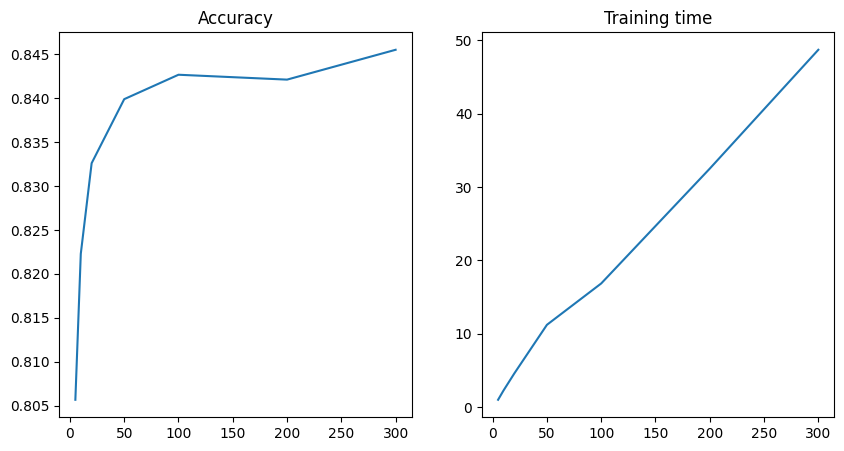

In [58]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
ax1.plot(estims,acc)
ax1.set_title('Accuracy')

ax2 = fig.add_subplot(122)
ax2.plot(estims,tim)
ax2.set_title('Training time')

In [59]:
acc, n_best1

([0.8056705170177281,
  0.8222867379084564,
  0.8326023843350423,
  0.8398912842053246,
  0.8426709494100932,
  0.8421150163691395,
  0.8455123849527457],
 300)

In [60]:
estims = [5,10,20,50,100,200,300]
model = RandomForestClassifier()
acc,tim = [], []
for x in estims:
    model = RandomForestClassifier(n_estimators=x)
    start = time.perf_counter()
    model.fit(X_train1,y_train1)
    end = time.perf_counter()
    y_pred = model.predict(X_val)
    _acc = accuracy_score(y_val,y_pred)
    tim.append(end-start)
    print(f'n_estimators: {x}, time_taken: {end-start}s, accuracy: {_acc}')
    acc.append(_acc)

n_best2 = estims[np.argmax(acc)]

n_estimators: 5, time_taken: 2.4205743999991682s, accuracy: 0.8044968805979369
n_estimators: 10, time_taken: 4.752283000001626s, accuracy: 0.8206189387855951
n_estimators: 20, time_taken: 9.193443600001046s, accuracy: 0.832417073321391
n_estimators: 50, time_taken: 23.191984400000365s, accuracy: 0.8376057817036259
n_estimators: 100, time_taken: 46.842805399999634s, accuracy: 0.8418679350176046
n_estimators: 200, time_taken: 93.10460659999808s, accuracy: 0.8419914756933721
n_estimators: 300, time_taken: 137.46106920000238s, accuracy: 0.8408796096114646


Text(0.5, 1.0, 'Training time')

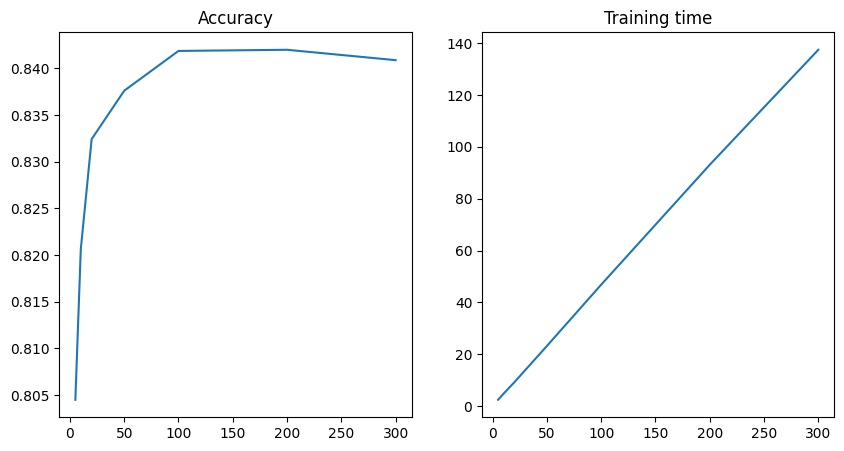

In [61]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
ax1.plot(estims,acc)
ax1.set_title('Accuracy')

ax2 = fig.add_subplot(122)
ax2.plot(estims,tim)
ax2.set_title('Training time')

In [62]:
acc, n_best2

([0.8044968805979369,
  0.8206189387855951,
  0.832417073321391,
  0.8376057817036259,
  0.8418679350176046,
  0.8419914756933721,
  0.8408796096114646],
 200)

In [63]:
%%time
rf_os = RandomForestClassifier(n_estimators=n_best1)
start = time.perf_counter()
rf_os.fit(X_train,y_train)
end = time.perf_counter()
print(f'Training ended in {end-start} s')

Training ended in 52.818588699999964 s
CPU times: total: 16.5 s
Wall time: 52.8 s


In [64]:
y_pred = rf_os.predict(X_val)
print(classification_report(y_val, y_pred, labels = sorted(list(set(y_enc))), digits=4))

              precision    recall  f1-score   support

           0     0.9491    0.8288    0.8849      5334
           1     0.6586    0.6416    0.6500      3139
           2     0.8509    0.9344    0.8907      7716

    accuracy                         0.8429     16189
   macro avg     0.8196    0.8016    0.8085     16189
weighted avg     0.8460    0.8429    0.8421     16189



### LightGBM

In [65]:
estims = [5,10,20,50,100,200,300]
model = LGBMClassifier()
acc,tim = [], []
for x in estims:
    model = LGBMClassifier(n_estimators=x)
    start = time.perf_counter()
    model.fit(X_train,y_train)
    end = time.perf_counter()
    y_pred = model.predict(X_val)
    _acc = accuracy_score(y_val,y_pred)
    tim.append(end-start)
    print(f'n_estimators: {x}, time_taken: {end-start}s, accuracy: {_acc}')
    acc.append(_acc)

n_best1 = estims[np.argmax(acc)]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2127
[LightGBM] [Info] Number of data points in the train set: 64753, number of used features: 55
[LightGBM] [Info] Start training from score -1.107984
[LightGBM] [Info] Start training from score -1.637280
[LightGBM] [Info] Start training from score -0.743877
n_estimators: 5, time_taken: 0.35541229999944335s, accuracy: 0.8159243931064303
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007796 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2127
[LightGBM] [Info] Number of data points in the train set: 64753, number of used features: 55
[LightGBM] [Info] Start training from score -1.10798

Text(0.5, 1.0, 'Training time')

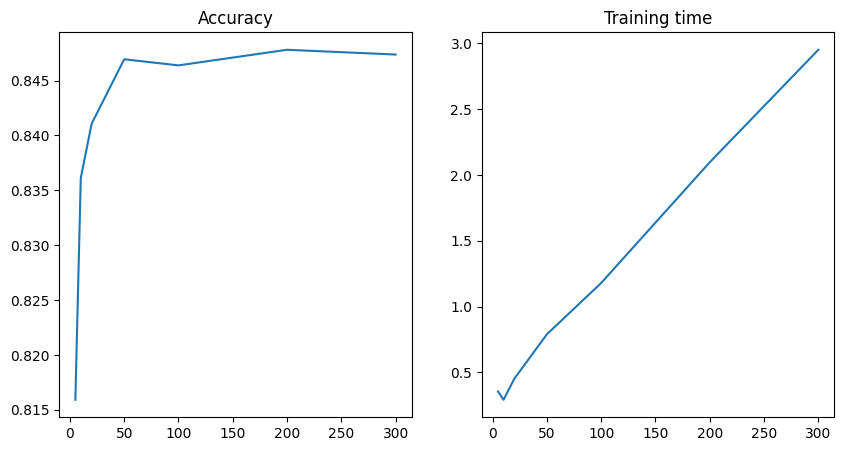

In [66]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
ax1.plot(estims,acc)
ax1.set_title('Accuracy')

ax2 = fig.add_subplot(122)
ax2.plot(estims,tim)
ax2.set_title('Training time')

In [67]:
acc, n_best1

([0.8159243931064303,
  0.836123293594416,
  0.8410649206251158,
  0.8469331027240719,
  0.8463771696831182,
  0.8477978874544444,
  0.8473654950892582],
 200)

In [68]:
estims = [5,10,20,50,100,200,300]
model = LGBMClassifier()
acc,tim = [], []
for x in estims:
    model = LGBMClassifier(n_estimators=x)
    start = time.perf_counter()
    model.fit(X_train1,y_train1)
    end = time.perf_counter()
    y_pred = model.predict(X_val)
    _acc = accuracy_score(y_val,y_pred)
    tim.append(end-start)
    print(f'n_estimators: {x}, time_taken: {end-start}s, accuracy: {_acc}')
    acc.append(_acc)

n_best2 = estims[np.argmax(acc)]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12762
[LightGBM] [Info] Number of data points in the train set: 92325, number of used features: 55
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
n_estimators: 5, time_taken: 0.5689229999989038s, accuracy: 0.8268577429118538
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12762
[LightGBM] [Info] Number of data points in the train set: 92325, number of used features: 55
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightG

Text(0.5, 1.0, 'Training time')

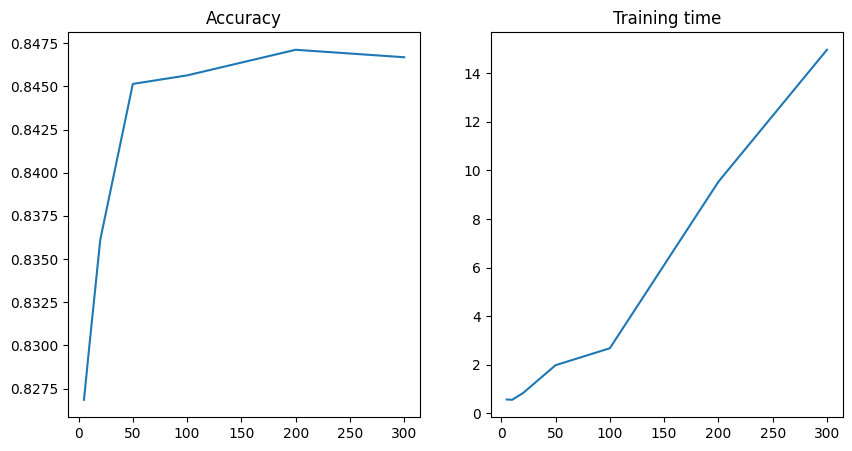

In [69]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
ax1.plot(estims,acc)
ax1.set_title('Accuracy')

ax2 = fig.add_subplot(122)
ax2.plot(estims,tim)
ax2.set_title('Training time')

In [70]:
acc,n_best2

([0.8268577429118538,
  0.8300080301439249,
  0.836123293594416,
  0.8451417629254432,
  0.8456359256285132,
  0.8471184137377231,
  0.8466860213725369],
 200)

In [71]:
%%time
lgbm_os = LGBMClassifier(n_estimators=n_best1)
start = time.perf_counter()
lgbm_os.fit(X_train,y_train)
end = time.perf_counter()
print(f'Training ended in {end-start} s')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2127
[LightGBM] [Info] Number of data points in the train set: 64753, number of used features: 55
[LightGBM] [Info] Start training from score -1.107984
[LightGBM] [Info] Start training from score -1.637280
[LightGBM] [Info] Start training from score -0.743877
Training ended in 4.894167999998899 s
CPU times: total: 34.7 s
Wall time: 4.89 s


In [72]:
y_pred = lgbm_os.predict(X_val)
print(classification_report(y_val, y_pred, labels = sorted(list(set(y_enc))), digits=4))

              precision    recall  f1-score   support

           0     0.9393    0.8442    0.8892      5334
           1     0.6732    0.6445    0.6585      3139
           2     0.8580    0.9330    0.8940      7716

    accuracy                         0.8478     16189
   macro avg     0.8235    0.8072    0.8139     16189
weighted avg     0.8490    0.8478    0.8467     16189



### Ensemble

In [73]:
%%time
hard_ensemble_os = VotingClassifier(estimators=[('rf',rf_os),('lgbm',lgbm_os)],voting='hard',weights=[1,1.2],verbose=True)
start = time.perf_counter()
hard_ensemble_os.fit(X_train,y_train)
end = time.perf_counter()
print(f'Total training time: {end-start} s')

[Voting] ....................... (1 of 2) Processing rf, total=  51.8s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2127
[LightGBM] [Info] Number of data points in the train set: 64753, number of used features: 55
[LightGBM] [Info] Start training from score -1.107984
[LightGBM] [Info] Start training from score -1.637280
[LightGBM] [Info] Start training from score -0.743877
[Voting] ..................... (2 of 2) Processing lgbm, total=   2.3s
Total training time: 54.1131678999991 s
CPU times: total: 23.9 s
Wall time: 55 s


In [74]:
y_pred = hard_ensemble_os.predict(X_val)
print(classification_report(y_val, y_pred, labels = sorted(list(set(y_enc))), digits=4))

              precision    recall  f1-score   support

           0     0.9393    0.8442    0.8892      5334
           1     0.6732    0.6445    0.6585      3139
           2     0.8580    0.9330    0.8940      7716

    accuracy                         0.8478     16189
   macro avg     0.8235    0.8072    0.8139     16189
weighted avg     0.8490    0.8478    0.8467     16189



## Test

In [75]:
test = pd.read_csv('data/cleaned_test_no_drop.csv')
test.shape

(51012, 58)

In [76]:
'id' in test.columns, test.columns

(True,
 Index(['Unnamed: 0', 'appln_order', 'gdp', 'mom_edu', 'nationality_log',
        'no_fee_dues_log', 'prog_of_study', 'is_international_student',
        'admission_grade', 'no_fee_dues', 'nationality', 'sem1_units_credited',
        'prev_edu_log', 'got_scholarship_log', 'sem1_units_grade_log',
        'sem2_units_credited_log', 'id', 'sem2_units_credited', 'dad_occup',
        'has_student_debt', 'marital_status', 'appln_order_log',
        'edu_spl_need_log', 'marital_status_log', 'sem2_units_eval',
        'appln_mode', 'sem2_units_enrolled', 'inflation',
        'sem2_units_no_eval_log', 'sem1_units_grade', 'sem1_units_eval',
        'sem1_units_no_eval_log', 'morn/eve_attend', 'mom_occup', 'dad_edu',
        'sem1_units_credited_log', 'sem2_units_grade', 'prev_edu',
        'mom_occup_log', 'has_student_debt_log', 'sem2_units_no_eval',
        'was_displaced', 'morn/eve_attend_log', 'sem1_units_approved',
        'dad_occup_log', 'age_at_start_log', 'sem1_units_no_eval',
 

In [77]:
X1 = test.drop(columns=['Unnamed: 0','id','nationality']).values
y1 = hard_ensemble_os.predict(X1)

In [78]:
test['Target'] = y1
test[['id','Target']]

,id,Target
0,76518,0
1,76519,1
2,76520,1
3,76521,1
4,76522,1
...,...,...
51007,127525,1
51008,127526,0
51009,127527,1
51010,127528,1


In [79]:
y_l.transform(['Graduate','Dropout','Enrolled'])

array([2, 0, 1])

In [80]:
mapp = {0:'Dropout',1:'Enrolled',2:'Graduate'}
test['Target'] = test['Target'].apply(lambda x: mapp[x])
test[['id','Target']]

,id,Target
0,76518,Dropout
1,76519,Enrolled
2,76520,Enrolled
3,76521,Enrolled
4,76522,Enrolled
...,...,...
51007,127525,Enrolled
51008,127526,Dropout
51009,127527,Enrolled
51010,127528,Enrolled


In [81]:
test[['id','Target']].to_csv('data/Sudu14_submission3.csv',index=False)